Train on 28800 samples, validate on 3200 samples
Epoch 1/100
28800/28800 [==============================] - 12s 427us/step - loss: 1.0871 - acc: 0.3919 - val_loss: 1.1048 - val_acc: 0.2981
Epoch 2/100
28800/28800 [==============================] - 5s 178us/step - loss: 1.0732 - acc: 0.4113 - val_loss: 1.1345 - val_acc: 0.2734
Epoch 3/100
28800/28800 [==============================] - 5s 179us/step - loss: 1.0687 - acc: 0.4173 - val_loss: 1.1017 - val_acc: 0.3456
Epoch 4/100
28800/28800 [==============================] - 6s 205us/step - loss: 1.0668 - acc: 0.4215 - val_loss: 1.0898 - val_acc: 0.3675
Epoch 5/100
28800/28800 [==============================] - 6s 193us/step - loss: 1.0656 - acc: 0.4225 - val_loss: 1.1041 - val_acc: 0.3306
Epoch 6/100
28800/28800 [==============================] - 6s 210us/step - loss: 1.0655 - acc: 0.4186 - val_loss: 1.0908 - val_acc: 0.3812
Epoch 7/100
28800/28800 [==============================] - 7s 239us/step - loss: 1.0636 - acc: 0.4276 - val_loss: 1.

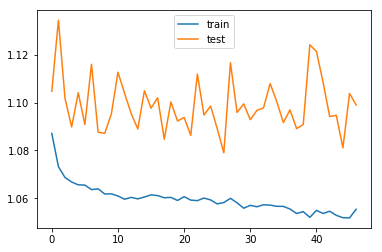

In [30]:
# Import dependencies
import numpy as np
import keras
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils, to_categorical
from keras import optimizers
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import math


# Constants & Hyperparameters
WINDOW_SIZE = 10 # Tested! 2
NUM_ITERATIONS = 40000 # Tested! 4 (40000)
TRAIN_TEST_RATIO = 0.8
NUM_HIDDEN_LAYERS = 10 # Tested! 3rd [0, 1, 2, 3, 4, 5, 6, 8, 10, 16, 20, 25, 30, 50, 100] Test again. 8
NODES_PER_LAYER = 64 # Tested! 6th (Test again.) 128
BATCH_SIZE = 64 # Tested! 5th (32 or 64)
EPOCHS = 100
DROPOUT = 0.3 # Tested! 1
LEARNING_RATE = 0.002 # Tested 6th (Possibly 0.001)


# Pre-processing
x = []
y = []
window = []

r_file = open('../data/convert_prices', 'r')
for i in range(NUM_ITERATIONS):
    window = []
    for j in range(WINDOW_SIZE):
        line = r_file.readline()
        window.append(line[:-1])
    x.append(window)
    next = r_file.readline()[:-1]
    y.append(next)

r_file.close()

training_size = int(TRAIN_TEST_RATIO * len(x))

x_train = x[:training_size]
x_test = x[training_size:]
y_train = y[:training_size]
y_test = y[training_size:]

# Use Keras to categorize the outputs ("one-hot" vectors)
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=3)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=3)


# Initialize simple neural network model
model = Sequential()

# Hidden layer 1: NODES_PER_LAYER neurons, 'relu' activation
model.add(Dense(units=NODES_PER_LAYER, input_dim=WINDOW_SIZE))
model.add(Activation('relu'))

# Hidden layer i: NODES_PER_LAYER neurons, 'relu' activation
for i in range(NUM_HIDDEN_LAYERS):
    model.add(Dense(units=NODES_PER_LAYER))
    model.add(Activation('relu'))
    model.add(Dropout(DROPOUT))

# Output layer: 3 neurons (one for each class), softmax activation
model.add(Dense(units=3))
model.add(Activation('softmax'))

# Print model summary
# model.summary()

# Compile the model
    # Loss: categorical cross-entropy
    # Optimizer: stochastic gradient descent (SGD)
    # Additional metrics: Accuracy
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=LEARNING_RATE),
              metrics=['accuracy'])

# Patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# Fit the model to the training data
history = model.fit(x_train, y_train_categorical,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_split=0.1,
          verbose=1,
          callbacks=[es])

# Evaluate trained model on test data
loss_and_metrics = model.evaluate(x_test, y_test_categorical, batch_size=1)

print("Accuracy is " + str(loss_and_metrics[1]))
    
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()